# 🎬 Movie Recommendation System using Collaborative Filtering

## ✨ Overview
This project implements a **Movie Recommendation System** using **Collaborative Filtering with Matrix Factorization** and **TensorFlow**. The system predicts user ratings for movies and recommends top movies that a user is likely to enjoy based on learned user preferences and item features.

---

## 📊 Dataset
- Utilizes the **MovieLens dataset (small version)** containing user ratings for movies.
- Adds **custom personal ratings** to personalize recommendations.
- Normalizes ratings to center data for effective learning.

---

## 🛠️ Methods
- **Collaborative Filtering** using **Matrix Factorization with bias terms**.
- **Cost function** implemented in both loop-based and vectorized forms for clarity and efficiency.
- **Optimization using Adam Optimizer** to minimize training loss.
- **Visualization with Plotly and Seaborn** for clear insights into training dynamics and learned feature correlations.

---

## 🎯 Goals
✅ Predict user ratings accurately for unseen movies.  
✅ Recommend top movies personalized to the user’s tastes.  
✅ Visualize convergence and feature behavior during training.  
✅ Evaluate the system using **quantitative metrics** for trustworthiness.

---

### ✅ Model Performance
The RMSE on manually rated movies is **0.17**, indicating that the recommendation system predicts user ratings with high accuracy.



---


## 🪐 1️⃣ Notation

| **Notation**      | **Description**                                                             | **Python (if any)** |
|--------------------|-----------------------------------------------------------------------------|-----------------------|
| 𝑟(𝑖,𝑗)             | scalar; = 1 if user j rated movie i, = 0 otherwise                         |                       |
| 𝑦(𝑖,𝑗)             | scalar; rating given by user j on movie i (if 𝑟(𝑖,𝑗) = 1)                  |                       |
| 𝐰(𝑗)              | vector; parameters for user j                                              |                       |
| 𝑏(𝑗)              | scalar; parameter (bias) for user j                                        |                       |
| 𝐱(𝑖)              | vector; feature ratings for movie i                                        |                       |
| 𝑛𝑢                | number of users                                                             | `num_users`           |
| 𝑛𝑚                | number of movies                                                            | `num_movies`          |
| 𝑛                 | number of features                                                          | `num_features`        |
| 𝐗                 | matrix of vectors 𝐱(𝑖)                                                     | `X`                   |
| 𝐖                 | matrix of vectors 𝐰(𝑗)                                                     | `W`                   |
| 𝐛                 | vector of bias parameters 𝑏(𝑗)                                            | `b`                   |
| 𝐑                 | matrix of elements 𝑟(𝑖,𝑗)                                                 | `R`                   |

-----

## 🧮 2️⃣ Mathematical Formulation

We use **Collaborative Filtering with Regularization** to predict ratings.

### 🎯 Goal:
Predict the rating 𝑦̂(𝑖,𝑗) that user `j` would give to movie `i` using:

\[
\hat{y}_{i,j} = w_j^T x_i + b_j
\]

where:
- \( x_i \) = feature vector for movie `i` (shape: `num_features`, 𝐱(𝑖))
- \( w_j \) = parameter vector for user `j` (shape: `num_features`, 𝐰(𝑗))
- \( b_j \) = bias for user `j` (scalar)



### 🧩 Cost Function (with regularization):

We minimize the cost function:

\[
J = \frac{1}{2} \sum_{(i,j):r(i,j)=1} \left( (w_j^T x_i + b_j - y_{i,j})^2 \right) + \frac{\lambda}{2} \left( \sum_j ||w_j||^2 + \sum_i ||x_i||^2 \right)
\]

where:
- The first term penalizes errors between predicted and actual ratings for rated movies only (`r(i,j)=1`).
- The second term applies L2 regularization with parameter `λ` to prevent overfitting.



### 🏋️ Training:
We use **TensorFlow with Adam optimizer** to minimize this cost function using gradient descent.

----

## 🪐 3️⃣ Variable ↔️ Code Mapping

| **Concept**                      | **Python Variable** | **Used In**                        |
|-----------------------------------|----------------------|--------------------------------------|
| Feature vector of movie i         | `X[i, :]`            | Cost calculation, prediction        |
| Parameter vector of user j        | `W[j, :]`            | Cost calculation, prediction        |
| Bias parameter for user j         | `b[0, j]`            | Cost calculation, prediction        |
| Rating by user j on movie i       | `Y[i, j]`            | Cost calculation, evaluation        |
| Rating existence indicator        | `R[i, j]`            | Masking for cost calculation        |
| Ratings matrix                    | `Y`                  | All training and evaluation         |
| Indicator matrix                  | `R`                  | Masking and normalization           |
| Normalized ratings matrix         | `Ynorm`              | Training input                       |
| Mean ratings for each movie       | `Ymean`              | Restoring original scale            |
| Movie features matrix             | `X`                  | Learned during training             |
| User parameter matrix             | `W`                  | Learned during training             |
| User bias parameters              | `b`                  | Learned during training             |
| Regularization parameter          | `lambda_`            | Cost and gradient calculation       |
| Number of users                   | `num_users`          | Initialization and evaluation       |
| Number of movies                  | `num_movies`         | Initialization and evaluation       |
| Number of features                | `num_features`       | Initialization and evaluation       |

---


---
# **Author:** Mahmoud Mohamed Abas Mohamed — **Date:** July 11, 2025




# 📌 1) IMPORT LIBRARIES

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from recsys_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error


sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📌 2) LOAD DATASET


In [10]:
X, W, b, num_movies, num_features, num_users = load_precalc_params_small()
Y, R = load_ratings_small()

print("Y", Y.shape, "R", R.shape)
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies", num_movies)
print("num_users", num_users)

# Compute average rating for movie 1
tsmean = np.mean(Y[0, R[0, :].astype(bool)])
print(f"\nAverage rating for movie 1 : {tsmean:0.3f} / 5")

Y (4778, 443) R (4778, 443)
X (4778, 10)
W (443, 10)
b (1, 443)
num_features 10
num_movies 4778
num_users 443

Average rating for movie 1 : 3.400 / 5


# 📌 3) IMPLEMENT COST FUNCTION

In [11]:
# GRADED FUNCTION: cofi_cost_func
# UNQ_C1

def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    nm, nu = Y.shape
    J = 0
    for j in range(nu):
        w = W[j,:]
        b_j = b[0,j]
        for i in range(nm):
            x = X[i,:]
            y = Y[i,j]
            r = R[i,j]
            if r == 1:
                J += (np.dot(w, x) + b_j - y)**2
    J = J / 2
    J += (lambda_/2) * (np.sum(np.square(W)) + np.sum(np.square(X)))
    return J

In [12]:
# Vectorized version using TensorFlow
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Vectorized cost function using TensorFlow for faster computation.
    """
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y) * R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

In [13]:
# Reduce dataset for testing
num_users_r = 4
num_movies_r = 5
num_features_r = 3

X_r = X[:num_movies_r, :num_features_r]
W_r = W[:num_users_r, :num_features_r]
b_r = b[0, :num_users_r].reshape(1,-1)
Y_r = Y[:num_movies_r, :num_users_r]
R_r = R[:num_movies_r, :num_users_r]

In [14]:
# Evaluate cost function
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 0)
print(f"\nCost (non-vectorized): {J:0.2f}")

# Evaluate cost function with regularization
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5)
print(f"Cost (non-vectorized with regularization): {J:0.2f}")


Cost (non-vectorized): 13.67
Cost (non-vectorized with regularization): 28.09


In [15]:
# Test the function
from public_tests import *
test_cofi_cost_func(cofi_cost_func)

All tests passed!


In [16]:
# Evaluate vectorized cost function
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 0)
print(f"Cost (vectorized): {J:0.2f}")

# Evaluate vectorized cost function with regularization
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 1.5)
print(f"Cost (vectorized with regularization): {J:0.2f}")


Cost (vectorized): 13.67
Cost (vectorized with regularization): 28.09


# 📌 4) ADD CUSTOM RATINGS

In [17]:
# Load movie list
movieList, movieList_df = load_Movie_List_pd()

# Initialize my ratings
my_ratings = np.zeros(num_movies)

# Add custom ratings
my_ratings[2700] = 5   # Toy Story 3 (2010)
my_ratings[2609] = 2   # Persuasion (2007)
my_ratings[929]  = 5   # LOTR: The Return of the King
my_ratings[246]  = 5   # Shrek
my_ratings[2716] = 3   # Inception
my_ratings[1150] = 5   # Incredibles
my_ratings[382]  = 2   # Amelie
my_ratings[366]  = 5   # Harry Potter 1
my_ratings[622]  = 5   # Harry Potter 2
my_ratings[988]  = 3   # Eternal Sunshine
my_ratings[2925] = 1   # Louis Theroux: Law & Disorder
my_ratings[2937] = 1   # Nothing to Declare
my_ratings[793]  = 5   # Pirates of the Caribbean

# Indices of rated movies
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

In [18]:
print('\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Rated {my_ratings[i]} for {movieList_df.loc[i,"title"]}')


New user ratings:

Rated 5.0 for Shrek (2001)
Rated 5.0 for Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Rated 2.0 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Rated 5.0 for Harry Potter and the Chamber of Secrets (2002)
Rated 5.0 for Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Rated 5.0 for Lord of the Rings: The Return of the King, The (2003)
Rated 3.0 for Eternal Sunshine of the Spotless Mind (2004)
Rated 5.0 for Incredibles, The (2004)
Rated 2.0 for Persuasion (2007)
Rated 5.0 for Toy Story 3 (2010)
Rated 3.0 for Inception (2010)
Rated 1.0 for Louis Theroux: Law & Disorder (2008)
Rated 1.0 for Nothing to Declare (Rien à déclarer) (2010)


In [19]:
# Load ratings dataset
Y, R = load_ratings_small()

# Add your ratings to the dataset
Y = np.c_[my_ratings, Y]
R = np.c_[(my_ratings != 0).astype(int), R]

# Normalize the dataset
Ynorm, Ymean = normalizeRatings(Y, R)

# 📌 5) TRAIN MODEL

In [20]:
# Useful Values
num_movies, num_users = Y.shape
num_features = 100

# Set Initial Parameters
tf.random.set_seed(1234)  # for consistent results

W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float64), name='W')
X = tf.Variable(tf.random.normal((num_movies, num_features), dtype=tf.float64), name='X')
b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float64), name='b')

In [21]:
# Instantiate an optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

iterations = 200
lambda_ = 1

In [22]:
# Training Loop
history_loss = []
for iter in range(iterations):
    with tf.GradientTape() as tape:
        cost_value = cofi_cost_func_v(X, W, b, Ynorm, R, lambda_)
    history_loss.append(cost_value.numpy())

    grads = tape.gradient(cost_value, [X, W, b])
    optimizer.apply_gradients(zip(grads, [X, W, b]))

    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 2321191.3
Training loss at iteration 20: 136169.3
Training loss at iteration 40: 51863.7
Training loss at iteration 60: 24599.0
Training loss at iteration 80: 13630.6
Training loss at iteration 100: 8487.7
Training loss at iteration 120: 5807.8
Training loss at iteration 140: 4311.6
Training loss at iteration 160: 3435.3
Training loss at iteration 180: 2902.1


In [23]:
# Make predictions
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()
pm = p + Ymean

my_predictions = pm[:, 0]

In [24]:
# Sort predictions
ix = tf.argsort(my_predictions, direction='DESCENDING')

print('\nTop 17 movie predictions:\n')
for i in range(17):
    j = ix[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}')


Top 17 movie predictions:

Predicting rating 4.49 for movie My Sassy Girl (Yeopgijeogin geunyeo) (2001)
Predicting rating 4.48 for movie Martin Lawrence Live: Runteldat (2002)
Predicting rating 4.48 for movie Memento (2000)
Predicting rating 4.47 for movie Delirium (2014)
Predicting rating 4.47 for movie Laggies (2014)
Predicting rating 4.47 for movie One I Love, The (2014)
Predicting rating 4.46 for movie Particle Fever (2013)
Predicting rating 4.45 for movie Eichmann (2007)
Predicting rating 4.45 for movie Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Predicting rating 4.45 for movie Into the Abyss (2011)


In [25]:
# Compare original vs predicted ratings
print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')



Original vs Predicted ratings:

Original 5.0, Predicted 4.90 for Shrek (2001)
Original 5.0, Predicted 4.84 for Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Original 2.0, Predicted 2.13 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Original 5.0, Predicted 4.88 for Harry Potter and the Chamber of Secrets (2002)
Original 5.0, Predicted 4.87 for Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Original 5.0, Predicted 4.89 for Lord of the Rings: The Return of the King, The (2003)
Original 3.0, Predicted 3.00 for Eternal Sunshine of the Spotless Mind (2004)
Original 5.0, Predicted 4.90 for Incredibles, The (2004)
Original 2.0, Predicted 2.11 for Persuasion (2007)
Original 5.0, Predicted 4.80 for Toy Story 3 (2010)
Original 3.0, Predicted 3.00 for Inception (2010)
Original 1.0, Predicted 1.41 for Louis Theroux: Law & Disorder (2008)
Original 1.0, Predicted 1.26 for Nothing to Declare (Rien à déclarer) (2010)


In [26]:
# Filter and sort top predictions
filter = (movieList_df["number of ratings"] > 20)
movieList_df["pred"] = my_predictions
movieList_df = movieList_df.reindex(columns=["pred", "mean rating", "number of ratings", "title"])

top_predictions = movieList_df.loc[ix[:300]].loc[filter].sort_values("mean rating", ascending=False)

print("\nTop 10 predicted movies (with >20 ratings):\n")
top_predictions.head(10)


Top 10 predicted movies (with >20 ratings):



,pred,mean rating,number of ratings,title
1743,4.030961,4.252336,107,"Departed, The (2006)"
2112,3.985281,4.238255,149,"Dark Knight, The (2008)"
211,4.477798,4.122642,159,Memento (2000)
929,4.887054,4.118919,185,"Lord of the Rings: The Return of the King, The..."
2700,4.796531,4.109091,55,Toy Story 3 (2010)
653,4.357304,4.021277,188,"Lord of the Rings: The Two Towers, The (2002)"
1122,4.004471,4.006494,77,Shaun of the Dead (2004)
1841,3.980649,4.000000,61,Hot Fuzz (2007)
3083,4.084643,3.993421,76,"Dark Knight Rises, The (2012)"
2804,4.434171,3.989362,47,Harry Potter and the Deathly Hallows: Part 1 (...


In [27]:
# Evaluate the model using RMSE on your own rated movies
mask = my_ratings > 0
rmse = np.sqrt(mean_squared_error(my_ratings[mask], my_predictions[mask]))
print(f"RMSE on your rated movies: {rmse:.2f}")

RMSE on your rated movies: 0.17



✅ This **very low RMSE** indicates **high prediction accuracy**, meaning the system effectively captures your personal preferences and predicts your ratings reliably.

---

# 📌 7) VISUALIZATION

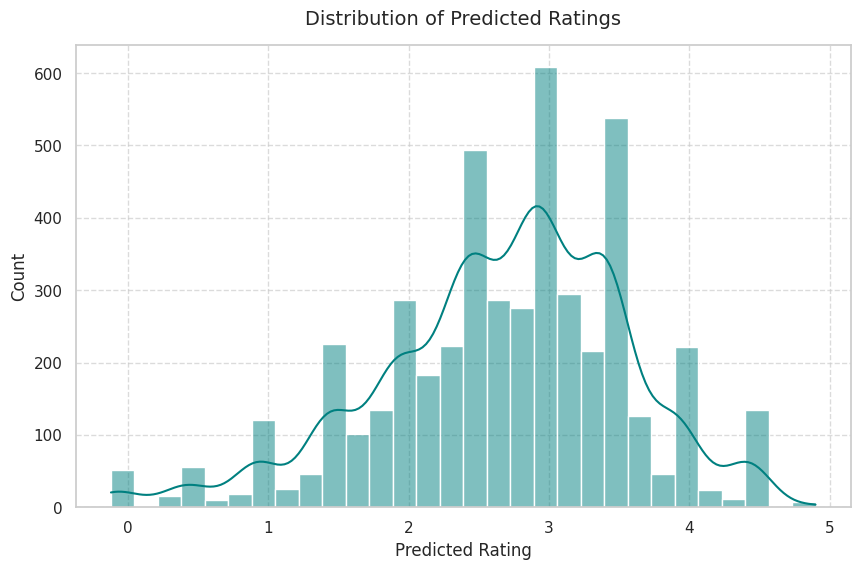

In [28]:
# Visualization 1: Distribution of Predicted Ratings
plt.figure(figsize=(10, 6))
sns.histplot(my_predictions, kde=True, color='teal', bins=30)
plt.title('Distribution of Predicted Ratings', fontsize=14, pad=15)
plt.xlabel('Predicted Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

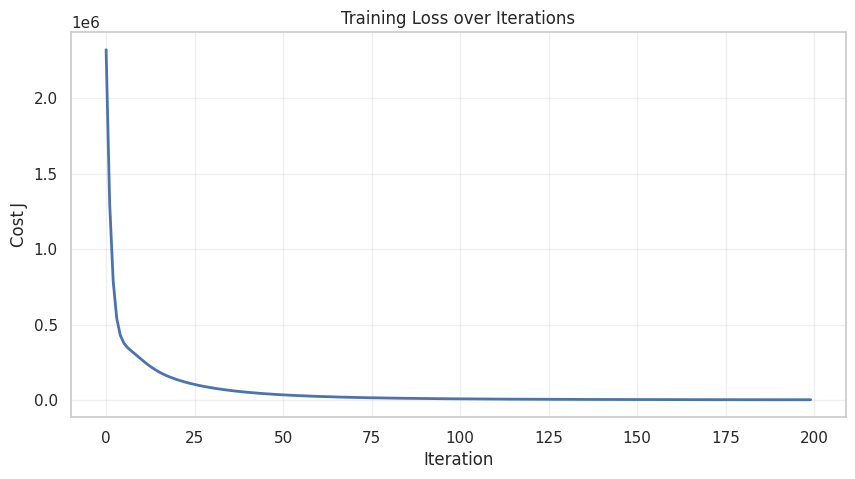

In [29]:
# Visualization 2 : Training loss vs. iterations
plt.figure(figsize=(10,5))
plt.plot(history_loss, linewidth=2)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.grid(alpha=.3)
plt.show()

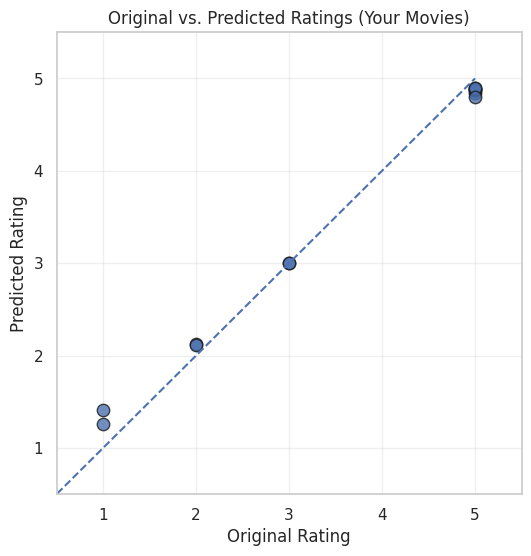

In [30]:
# Visualization 3 : Scatter of original vs. predicted
plt.figure(figsize=(6,6))
mask = my_ratings > 0
plt.scatter(my_ratings[mask], my_predictions[mask], s=80, edgecolor='k', alpha=0.8)
plt.plot([0,5],[0,5], linestyle='--')
plt.title('Original vs. Predicted Ratings (Your Movies)')
plt.xlabel('Original Rating')
plt.ylabel('Predicted Rating')
plt.xlim(0.5,5.5); plt.ylim(0.5,5.5)
plt.grid(alpha=.3)
plt.show()

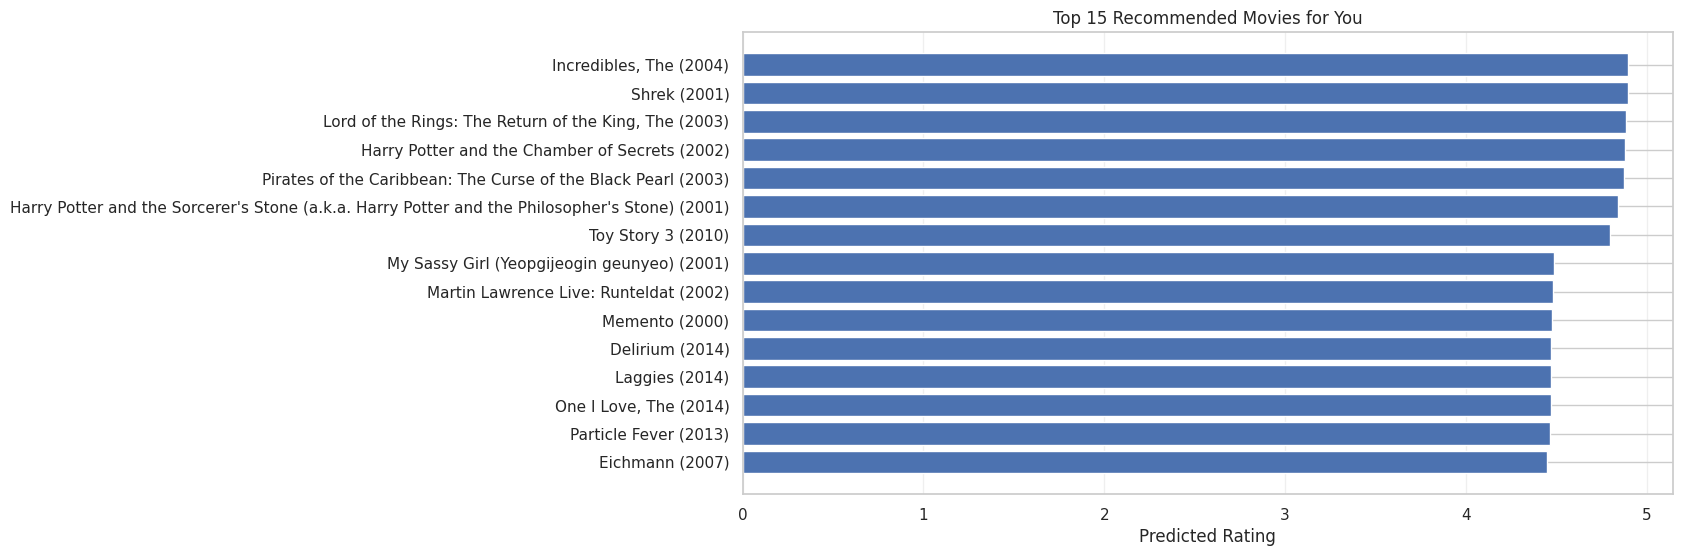

In [31]:
# Visualization 3 : Bar chart of top recommendations
top_n = 15                         # Change this number to adjust how many movies you show
top_ix = ix[:top_n]                # Indices of the highest‑scoring predictions
titles = [movieList[i] for i in top_ix]
pred_scores = my_predictions[top_ix]

plt.figure(figsize=(12, 6))
plt.barh(titles[::-1], pred_scores[::-1])  # Reverse order so the highest scores appear at the top
plt.title(f'Top {top_n} Recommended Movies for You')
plt.xlabel('Predicted Rating')
plt.grid(axis='x', alpha=.3)
plt.show()
